<img src="logo-banner-ITESO.png">

___
# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
- <Strong> Nombre: </Strong>  <font color="blue"> José Manuel Haces López - 734759 </font>
- <Strong> Fecha </Strong>: <font color="blue"> 22/09/2021 </font>
- <Strong> Correo: </Strong>  <font color="blue"> jose.haces@iteso.mx </font>
___


### <font color= #2E9AFE> Tarea 2: Aplicación de Redes Neuronales</font>

El conjunto de datos “Appliances energy prediction” puede encontrarse en el repositorio “UC Irvine Machine Learning Repository” (https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction# ).

Los datos recolectados están relacionados con medidas de temperatura y humedad dentro de diferentes cuartos dentro de una casa; también se consideran medidas climáticas de fuera de la casa. 

El objetivo principal es validar si el total de energía usada en la casa "(Appliances + lights)" puede ser estimado utilizando una red neuronal a través de las otras variables del conjunto de datos como datos de entrada.    

In [1]:
# Importamos las librerias que utilizaremos a lo largo de esta tarea.

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import keras

## Introducción:
- Buscamos poder encontrar una estimación por medio de una red neuronal, con la cual podamos (por medio del csv) aproximarnos al consumo energetico total de un hogar.

Para empezar, haremos una pequeña exploración de los datos, para ver qé es lo que tenemos.

In [3]:
data = pd.read_csv('energydata_complete.csv')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
# Guardamos el nombre de cada columna de nuestra data

columnas = data.columns
columnas

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

**Veamos lo que nos dice la pagina de donde sacamos los datos de cada variable (columna)**
- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [5]:
# Veamos cuáles son los tipos de datos con los que cuenta cada columna

data.dtypes
dtyp = pd.DataFrame(data.dtypes,columns=['Tipo'])
dtyp

,Tipo
date,object
Appliances,int64
lights,int64
T1,float64
RH_1,float64
T2,float64
RH_2,float64
T3,float64
RH_3,float64
T4,float64


Parece ser que sólo hay datos numéricos (sin contar la variable 'date').

## Desarrollo.

### 1. Determine los datos nulos y decida si se necesita implementar una estrategia para rellenar estos datos.

In [6]:
# Número de valores únicos con los que cuenta cada variable

valuni = pd.DataFrame(data.nunique(), columns=['Valores_Unicos'])
valuni

,Valores_Unicos
date,19735
Appliances,92
lights,8
T1,722
RH_1,2547
T2,1650
RH_2,3376
T3,1426
RH_3,2618
T4,1390


In [7]:
# Mostremos cuáles son los valores únicos de cada variable.

for i in range(len(columnas)):
    print(columnas[i], '\n', data[columnas[i]].unique(), '\n\n')

date 
 ['2016-01-11 17:00:00' '2016-01-11 17:10:00' '2016-01-11 17:20:00' ...
 '2016-05-27 17:40:00' '2016-05-27 17:50:00' '2016-05-27 18:00:00'] 


Appliances 
 [  60   50   70  230  580  430  250  100   90   80  140  120  190  110
  400  390  240   40   30  310  380  370   20  260  500  450  220  170
  290  130  200  210  180  350  300  340  150  330  420  520  360  270
  550  690  620  610  490  410  320  740  910  510  790  460  160  480
  280  560 1080  750  470  440  800  540  530  660  630  600   10  570
  830 1070  890  590  850  710  680  670  780  640  650  700  770  720
  760  860  880  730  900  820  870  840] 


lights 
 [30 40 50 70 60 10 20  0] 


T1 
 [19.89       19.85666667 19.79       19.92666667 20.06666667 20.13333333
 20.26       20.42666667 20.56666667 20.73       20.85666667 20.89
 20.96333333 21.03333333 21.1        21.13333333 21.2        21.29
 21.35666667 21.39       21.5        21.53333333 21.6        21.26
 21.16666667 21.075      21.         20.92666667 2

Hechando un vistazo rápido podemos obervar que no hay algún dato que nos llame la atención. Hagamos una última comprobación con una función.

In [8]:
# Usaremos la función de pandas.isnull para ver si hay algun valor único.
for i in columnas:
    print(f'{i} tiene algun NaN: {pd.isnull(data[i]).unique()} \n')

date tiene algun NaN: [False] 

Appliances tiene algun NaN: [False] 

lights tiene algun NaN: [False] 

T1 tiene algun NaN: [False] 

RH_1 tiene algun NaN: [False] 

T2 tiene algun NaN: [False] 

RH_2 tiene algun NaN: [False] 

T3 tiene algun NaN: [False] 

RH_3 tiene algun NaN: [False] 

T4 tiene algun NaN: [False] 

RH_4 tiene algun NaN: [False] 

T5 tiene algun NaN: [False] 

RH_5 tiene algun NaN: [False] 

T6 tiene algun NaN: [False] 

RH_6 tiene algun NaN: [False] 

T7 tiene algun NaN: [False] 

RH_7 tiene algun NaN: [False] 

T8 tiene algun NaN: [False] 

RH_8 tiene algun NaN: [False] 

T9 tiene algun NaN: [False] 

RH_9 tiene algun NaN: [False] 

T_out tiene algun NaN: [False] 

Press_mm_hg tiene algun NaN: [False] 

RH_out tiene algun NaN: [False] 

Windspeed tiene algun NaN: [False] 

Visibility tiene algun NaN: [False] 

Tdewpoint tiene algun NaN: [False] 

rv1 tiene algun NaN: [False] 

rv2 tiene algun NaN: [False] 



**Haciendo una pequeña exploración de los datos, sacamos las siguientes conclusiones de la pregunta 1:**
- En el paso anterior nos arrojo que todas las variables nos dan '[False]', por lo que nos dice que NO hay variables nulas en la columna. 
- Además, en la documentación del csv con los datos, se puede ver que nos dice que no hay datos nulos.

*Por lo tanto, al no haber datos nulos, no necesitamos efectuar alguna estrategia para procesar datos nulos.*

### 1.1 Hagamos los cambios sugeridos y la variable de respuesta apropiada (y)
- 1.11 Las variables que nos recomiendan quitar son:
    - fecha 
    - rv1
    - rv2
- 1.12 Hacer que la variable de respuesta sea la suma de 'Appliances' y 'Lights', además de eliminarlas para no hacer un leakage en nuestro modelo.

In [9]:
# 1.11: Hacemos una lista de las columnas a eliminar y las dropeamos en una copia de nuestros datos.

columnas_eliminar = ['date', 'rv1', 'rv2']

df = data.copy()
df = data.drop(columnas_eliminar, axis=1)
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333


In [10]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'],
      dtype='object')

Observamos que efectivamente las variables han sido eliminadas.

In [11]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [12]:
# 1.12: Creamos una nueva variable llamada 'Energy_Use' (y)
df['Energy_Use'] = df['Appliances'] + df['lights']
df['Energy_Use']

0         90
1         90
2         80
3         90
4        100
        ... 
19730    100
19731     90
19732    280
19733    430
19734    440
Name: Energy_Use, Length: 19735, dtype: int64

In [13]:
# Así mismo, eliminaremos 'Appliances' y 'lights' para evitar leakage o fugas.

columnas_eliminar = ['Appliances', 'lights']

df = df.drop(columnas_eliminar, axis=1)
df

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Energy_Use
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,90
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,90
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,80
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,90
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,...,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,100
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,...,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,90
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,...,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,280
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,...,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,430


In [14]:
df.columns

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
       'Energy_Use'],
      dtype='object')

Listo, terminamos con el procesamiento de los datos. Contamos con nuestra variable de respuesta y eliminamos algunas varibales que nos comentaron previamente que nos iban a causar ruido.

### 2. Cree dos subconjuntos de datos, para usar el primero para el proceso de entrenamiento (train) y el segundo para el proceso de prueba (test).

In [15]:
# Hacemos nuestras X (variables)
varsX = (df.columns).drop('Energy_Use') 
# Metemos todo en una variable llamada X
X = df[varsX]


# Hacemos nuestra Y o Variable a predecir.
Y = df['Energy_Use']

In [16]:
# Comprobamos que no haya algún problema.

X

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19731,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19732,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
19733,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333


In [17]:
Y

0         90
1         90
2         80
3         90
4        100
        ... 
19730    100
19731     90
19732    280
19733    430
19734    440
Name: Energy_Use, Length: 19735, dtype: int64

In [18]:
# Le hacemos un escalamiento a los datos

from sklearn import preprocessing
X = preprocessing.scale(X)
Y = preprocessing.scale(Y)

In [19]:
#Dividimos nuestros datos en test y train, con un tamaño de entrenamiento del 80%.

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, random_state=42)

Listo, ya tenemos nuestros datos divididos en entrenamiento y testeo. Por lo que, ya podremos seguir con la creación de nuestro modelo.

### 3. Entrene una red neuronal para estimar la energía total utilizada (Energy_Use). 

In [20]:
# Diseño del modelo

#Inicializo objeto
model = Sequential()

#Agregar capas
#Agregamos la primera capa de entrada
model.add(Dense(15, activation='tanh', input_dim=24))
# Agregamos otra capa oculta
model.add(Dense(45, activation='relu'))
#Agregamos la capa de salida
model.add(Dense(1, activation='linear'))

learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)


model.compile(loss='mean_squared_error',
              optimizer=sgd, 
             metrics = ['mse'])

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))

Epoch 1/200
158/158 [==============================] - 1s 3ms/step - loss: 0.9037 - mse: 0.9037 - val_loss: 0.8005 - val_mse: 0.8005
Epoch 2/200
158/158 [==============================] - 0s 2ms/step - loss: 0.8274 - mse: 0.8274 - val_loss: 0.7759 - val_mse: 0.7759
Epoch 3/200
158/158 [==============================] - 0s 2ms/step - loss: 0.8089 - mse: 0.8089 - val_loss: 0.7665 - val_mse: 0.7665
Epoch 4/200
158/158 [==============================] - 0s 2ms/step - loss: 0.7780 - mse: 0.7780 - val_loss: 0.7618 - val_mse: 0.7618
Epoch 5/200
158/158 [==============================] - 0s 2ms/step - loss: 0.7564 - mse: 0.7564 - val_loss: 0.7571 - val_mse: 0.7571
Epoch 6/200
158/158 [==============================] - 0s 2ms/step - loss: 0.7392 - mse: 0.7392 - val_loss: 0.7291 - val_mse: 0.7291
Epoch 7/200
158/158 [==============================] - 0s 2ms/step - loss: 0.7322 - mse: 0.7322 - val_loss: 0.7063 - val_mse: 0.7063
Epoch 8/200
158/158 [==============================] - 0s 1ms/step - 

158/158 [==============================] - 0s 2ms/step - loss: 0.4599 - mse: 0.4599 - val_loss: 0.6488 - val_mse: 0.6488
Epoch 124/200
158/158 [==============================] - 0s 2ms/step - loss: 0.4617 - mse: 0.4617 - val_loss: 0.6280 - val_mse: 0.6280
Epoch 125/200
158/158 [==============================] - 0s 2ms/step - loss: 0.4641 - mse: 0.4641 - val_loss: 0.6255 - val_mse: 0.6255
Epoch 126/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4609 - mse: 0.4609 - val_loss: 0.6272 - val_mse: 0.6272
Epoch 127/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4610 - mse: 0.4610 - val_loss: 0.6254 - val_mse: 0.6254
Epoch 128/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4611 - mse: 0.4611 - val_loss: 0.6243 - val_mse: 0.6243
Epoch 129/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4577 - mse: 0.4577 - val_loss: 0.6270 - val_mse: 0.6270
Epoch 130/200
158/158 [==============================] - 0s 1ms/step 

Epoch 184/200
158/158 [==============================] - 0s 2ms/step - loss: 0.4390 - mse: 0.4390 - val_loss: 0.6211 - val_mse: 0.6211
Epoch 185/200
158/158 [==============================] - 0s 2ms/step - loss: 0.4381 - mse: 0.4381 - val_loss: 0.6235 - val_mse: 0.6235
Epoch 186/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4381 - mse: 0.4381 - val_loss: 0.6289 - val_mse: 0.6289
Epoch 187/200
158/158 [==============================] - 0s 1ms/step - loss: 0.4409 - mse: 0.4409 - val_loss: 0.6323 - val_mse: 0.6323
Epoch 188/200
158/158 [==============================] - 0s 2ms/step - loss: 0.4381 - mse: 0.4381 - val_loss: 0.6211 - val_mse: 0.6211
Epoch 189/200
158/158 [==============================] - 0s 2ms/step - loss: 0.4354 - mse: 0.4354 - val_loss: 0.6279 - val_mse: 0.6279
Epoch 190/200
158/158 [==============================] - 0s 2ms/step - loss: 0.4364 - mse: 0.4364 - val_loss: 0.6211 - val_mse: 0.6211
Epoch 191/200
158/158 [==============================] 

### 3.1 Obtenga los valores MSE y R^2 para evaluar el rendimiento del modelo en las pruebas.

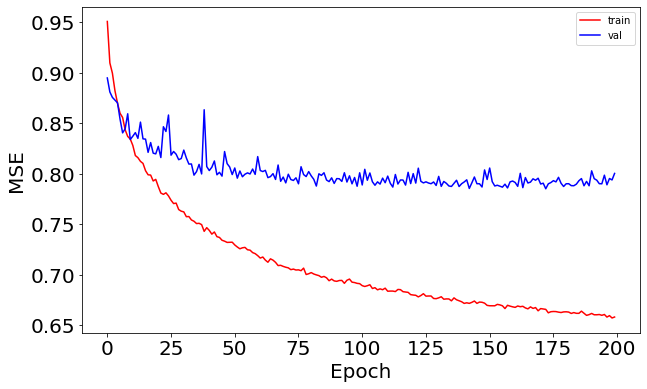

In [22]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [23]:
#Evaluación del modelo

#Evaluación del modelo en los datos de prueba
score = model.evaluate(X_test,y_test)
print('Test mse:', score[1])


124/124 [==============================] - 0s 894us/step - loss: 0.6404 - mse: 0.6404
Test mse: 0.6404310464859009


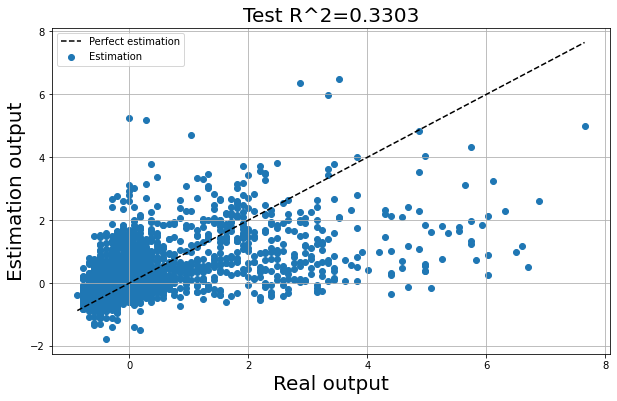

In [24]:
#Con datos del test
yhat = model.predict(X_test)
R2_score = r2_score(y_test,yhat)
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [25]:
print('R2:', R2_score)

R2: 0.33030599679320305


### 4. Implemente el ajuste de hiperparámetros del algoritmo de entrenamiento a través de GridSearch y pruébelo en los datos del test.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,make_scorer
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from tensorflow.keras.optimizers import SGD
import tensorflow

In [27]:
def create_model(lr=0.1,momentum=0.8):
    model = Sequential()

    model.add(Dense(15, activation='tanh', input_dim=24))
    # Agregamos otra capa oculta
    model.add(Dense(45, activation='relu'))
    #Agregamos la capa de salida
    model.add(Dense(1, activation='linear'))
    
    # Optimizer configuration
    opt = tensorflow.keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100
#learning_rate = 0.1
#decay_rate = learning_rate/epochs
#momentum = 0.8

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.9, 0.85, 0.8]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(r2_score) #r2
#selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=2,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

# Imprimir resultados
# means es de la R2 que pusimos antes
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Epoch 1/200


C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


247/247 [==============================] - 1s 1ms/step - loss: 0.9770 - mse: 0.9770
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9726 - mse: 0.9726
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9335 - mse: 0.9335
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9607 - mse: 0.9607
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9482 - mse: 0.9482
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9657 - mse: 0.9657
Epoch 7/200
247/247 [==============================] - 0s 996us/step - loss: 0.9876 - mse: 0.9876
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9934 - mse: 0.9934
Epoch 9/200
247/247 [==============================] - 0s 976us/step - loss: 0.9702 - mse: 0.9702
Epoch 10/200
247/247 [==============================] - 0s 988us/step - loss: 0.9839 - mse: 0.9839
Epoch 11/200
247/247 [=======================

247/247 [==============================] - 0s 1ms/step - loss: 1.0278 - mse: 1.0278
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0244 - mse: 1.0244
Epoch 170/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0221 - mse: 1.0221
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0199 - mse: 1.0199
Epoch 172/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0152 - mse: 1.0152
Epoch 173/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0164 - mse: 1.0164
Epoch 174/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0294 - mse: 1.0294
Epoch 175/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0198 - mse: 1.0198
Epoch 176/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0045 - mse: 1.0045
Epoch 177/200
247/247 [==============================] - 0s 992us/step - loss: 1.0202 - mse: 1.0202
Epoch 178/200
247/247 [=========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 1.0487 - mse: 1.0487
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0018 - mse: 1.0018
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0020 - mse: 1.0020
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0045 - mse: 1.0045
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0381 - mse: 1.0381
Epoch 6/200
247/247 [==============================] - 0s 963us/step - loss: 1.0434 - mse: 1.0434
Epoch 7/200
247/247 [==============================] - 0s 980us/step - loss: 1.0199 - mse: 1.0199
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0289 - mse: 1.0289
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0308 - mse: 1.0308
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9999 - mse: 0.9999
Epoch 11/200
247/247 [=============

247/247 [==============================] - 0s 998us/step - loss: 1.0737 - mse: 1.0737
Epoch 86/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0607 - mse: 1.0607
Epoch 87/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0649 - mse: 1.0649
Epoch 88/200
247/247 [==============================] - 0s 980us/step - loss: 1.0638 - mse: 1.0638
Epoch 89/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0888 - mse: 1.0888
Epoch 90/200
247/247 [==============================] - 0s 996us/step - loss: 1.0675 - mse: 1.0675
Epoch 91/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0596 - mse: 1.0596
Epoch 92/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0916 - mse: 1.0916
Epoch 93/200
247/247 [==============================] - 0s 992us/step - loss: 1.0746 - mse: 1.0746
Epoch 94/200
247/247 [==============================] - 0s 1ms/step - loss: 1.0733 - mse: 1.0733
Epoch 95/200
247/247 [=============

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.9726 - mse: 0.9726
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9324 - mse: 0.9324
Epoch 3/200
247/247 [==============================] - 0s 988us/step - loss: 0.8808 - mse: 0.8808
Epoch 4/200
247/247 [==============================] - 0s 996us/step - loss: 0.9045 - mse: 0.9045
Epoch 5/200
247/247 [==============================] - 0s 980us/step - loss: 0.8846 - mse: 0.8846
Epoch 6/200
247/247 [==============================] - 0s 976us/step - loss: 0.8545 - mse: 0.8545
Epoch 7/200
247/247 [==============================] - 0s 981us/step - loss: 0.8899 - mse: 0.8899
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8774 - mse: 0.8774
Epoch 9/200
247/247 [==============================] - 0s 999us/step - loss: 0.8596 - mse: 0.8596
Epoch 10/200
247/247 [==============================] - 0s 980us/step - loss: 0.8552 - mse: 0.8552
Epoch 11/200
247/247 [===

247/247 [==============================] - 0s 1ms/step - loss: 0.8194 - mse: 0.8194
Epoch 86/200
247/247 [==============================] - 0s 993us/step - loss: 0.8196 - mse: 0.8196
Epoch 87/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8179 - mse: 0.8179
Epoch 88/200
247/247 [==============================] - 0s 996us/step - loss: 0.7908 - mse: 0.7908
Epoch 89/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7778 - mse: 0.7778
Epoch 90/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8292 - mse: 0.8292
Epoch 91/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8171 - mse: 0.8171
Epoch 92/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8403 - mse: 0.8403
Epoch 93/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8039 - mse: 0.8039
Epoch 94/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8108 - mse: 0.8108
Epoch 95/200
247/247 [=================

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 1.0015 - mse: 1.0015
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9558 - mse: 0.9558
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9394 - mse: 0.9394
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9196 - mse: 0.9196
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9198 - mse: 0.9198
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9174 - mse: 0.9174
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9132 - mse: 0.9132
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9216 - mse: 0.9216
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9073 - mse: 0.9073
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9163 - mse: 0.9163
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 2ms/step - loss: 0.7806 - mse: 0.7806
Epoch 169/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7789 - mse: 0.7789
Epoch 170/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7867 - mse: 0.7867
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7754 - mse: 0.7754
Epoch 172/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7832 - mse: 0.7832
Epoch 173/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7986 - mse: 0.7986
Epoch 174/200
247/247 [==============================] - 1s 2ms/step - loss: 0.7804 - mse: 0.7804
Epoch 175/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7725 - mse: 0.7725
Epoch 176/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7695 - mse: 0.7695
Epoch 177/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7372 - mse: 0.7372
Epoch 178/200
247/247 [===========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.9262 - mse: 0.9262
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8701 - mse: 0.8701
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8449 - mse: 0.8449
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8386 - mse: 0.8386
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8271 - mse: 0.8271
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8288 - mse: 0.8288
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7993 - mse: 0.7993
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8248 - mse: 0.8248
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8041 - mse: 0.8041
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7850 - mse: 0.7850
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 1ms/step - loss: 0.5431 - mse: 0.5431
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5560 - mse: 0.5560
Epoch 170/200
247/247 [==============================] - 0s 984us/step - loss: 0.5352 - mse: 0.5352
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5442 - mse: 0.5442
Epoch 172/200
247/247 [==============================] - 0s 987us/step - loss: 0.5329 - mse: 0.5329
Epoch 173/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5514 - mse: 0.5514
Epoch 174/200
247/247 [==============================] - 0s 994us/step - loss: 0.5636 - mse: 0.5636
Epoch 175/200
247/247 [==============================] - 0s 980us/step - loss: 0.5179 - mse: 0.5179
Epoch 176/200
247/247 [==============================] - 0s 980us/step - loss: 0.5373 - mse: 0.5373
Epoch 177/200
247/247 [==============================] - 0s 996us/step - loss: 0.5332 - mse: 0.5332
Epoch 178/200
247/247 

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.9703 - mse: 0.9703
Epoch 2/200
247/247 [==============================] - 0s 988us/step - loss: 0.9205 - mse: 0.9205
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9168 - mse: 0.9168
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8866 - mse: 0.8866
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8853 - mse: 0.8853
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8790 - mse: 0.8790
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8824 - mse: 0.8824
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8662 - mse: 0.8662
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8604 - mse: 0.8604
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8524 - mse: 0.8524
Epoch 11/200
247/247 [===============

247/247 [==============================] - 0s 1ms/step - loss: 0.6574 - mse: 0.6574
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6501 - mse: 0.6501
Epoch 170/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6365 - mse: 0.6365
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6373 - mse: 0.6373
Epoch 172/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6369 - mse: 0.6369
Epoch 173/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6481 - mse: 0.6481
Epoch 174/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6503 - mse: 0.6503
Epoch 175/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6424 - mse: 0.6424
Epoch 176/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6378 - mse: 0.6378
Epoch 177/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6339 - mse: 0.6339
Epoch 178/200
247/247 [===========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 986us/step - loss: 0.9305 - mse: 0.9305
Epoch 2/200
247/247 [==============================] - 0s 976us/step - loss: 0.8732 - mse: 0.8732
Epoch 3/200
247/247 [==============================] - 0s 972us/step - loss: 0.8541 - mse: 0.8541
Epoch 4/200
247/247 [==============================] - 0s 980us/step - loss: 0.8432 - mse: 0.8432
Epoch 5/200
247/247 [==============================] - 0s 996us/step - loss: 0.8171 - mse: 0.8171
Epoch 6/200
247/247 [==============================] - 0s 988us/step - loss: 0.8084 - mse: 0.8084
Epoch 7/200
247/247 [==============================] - 0s 988us/step - loss: 0.8001 - mse: 0.8001
Epoch 8/200
247/247 [==============================] - 0s 989us/step - loss: 0.8240 - mse: 0.8240
Epoch 9/200
247/247 [==============================] - 0s 992us/step - loss: 0.7833 - mse: 0.7833
Epoch 10/200
247/247 [==============================] - 0s 972us/step - loss: 0.7905 - mse: 0.7905
Epoch 11/200
247/24

247/247 [==============================] - 0s 1ms/step - loss: 0.5798 - mse: 0.5798
Epoch 168/200
247/247 [==============================] - 0s 2ms/step - loss: 0.5725 - mse: 0.5725
Epoch 169/200
247/247 [==============================] - 1s 3ms/step - loss: 0.5684 - mse: 0.5684
Epoch 170/200
247/247 [==============================] - 0s 2ms/step - loss: 0.5445 - mse: 0.5445
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5407 - mse: 0.5407
Epoch 172/200
247/247 [==============================] - 0s 2ms/step - loss: 0.5421 - mse: 0.5421
Epoch 173/200
247/247 [==============================] - 0s 2ms/step - loss: 0.5879 - mse: 0.5879
Epoch 174/200
247/247 [==============================] - 0s 2ms/step - loss: 0.5761 - mse: 0.5761
Epoch 175/200
247/247 [==============================] - 0s 2ms/step - loss: 0.5779 - mse: 0.5779
Epoch 176/200
247/247 [==============================] - 0s 2ms/step - loss: 0.5708 - mse: 0.5708
Epoch 177/200
247/247 [===========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.9935 - mse: 0.9935
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.9370 - mse: 0.9370
Epoch 3/200
247/247 [==============================] - 0s 2ms/step - loss: 0.9031 - mse: 0.9031
Epoch 4/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8917 - mse: 0.8917
Epoch 5/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8761 - mse: 0.8761
Epoch 6/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8657 - mse: 0.8657
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8474 - mse: 0.8474
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8516 - mse: 0.8516
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8518 - mse: 0.8518
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8398 - mse: 0.8398
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 1ms/step - loss: 0.6672 - mse: 0.6672
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6846 - mse: 0.6846
Epoch 170/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7338 - mse: 0.7338
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6949 - mse: 0.6949
Epoch 172/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6870 - mse: 0.6870
Epoch 173/200
247/247 [==============================] - 0s 997us/step - loss: 0.6436 - mse: 0.6436
Epoch 174/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6641 - mse: 0.6641
Epoch 175/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7221 - mse: 0.7221
Epoch 176/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6727 - mse: 0.6727
Epoch 177/200
247/247 [==============================] - 0s 1ms/step - loss: 0.6982 - mse: 0.6982
Epoch 178/200
247/247 [=========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.9224 - mse: 0.9224
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8557 - mse: 0.8557
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8238 - mse: 0.8238
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7956 - mse: 0.7956
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7913 - mse: 0.7913
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7683 - mse: 0.7683
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7678 - mse: 0.7678
Epoch 8/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7536 - mse: 0.7536
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7412 - mse: 0.7412
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7353 - mse: 0.7353
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 1ms/step - loss: 0.4530 - mse: 0.4530
Epoch 167/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4665 - mse: 0.4665
Epoch 168/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4791 - mse: 0.4791
Epoch 169/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4583 - mse: 0.4583
Epoch 170/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4381 - mse: 0.4381
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4583 - mse: 0.4583
Epoch 172/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4559 - mse: 0.4559
Epoch 173/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4231 - mse: 0.4231
Epoch 174/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4405 - mse: 0.4405
Epoch 175/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4417 - mse: 0.4417
Epoch 176/200
247/247 [===========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 2ms/step - loss: 0.9521 - mse: 0.9521
Epoch 2/200
247/247 [==============================] - 1s 2ms/step - loss: 0.8794 - mse: 0.8794
Epoch 3/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8679 - mse: 0.8679
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8479 - mse: 0.8479
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8353 - mse: 0.8353
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8281 - mse: 0.8281
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8105 - mse: 0.8105
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8033 - mse: 0.8033
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7896 - mse: 0.7896
Epoch 10/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7782 - mse: 0.7782
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 1ms/step - loss: 0.4647 - mse: 0.4647
Epoch 166/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4703 - mse: 0.4703
Epoch 167/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4814 - mse: 0.4814
Epoch 168/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4625 - mse: 0.4625
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4522 - mse: 0.4522
Epoch 170/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4477 - mse: 0.4477
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4526 - mse: 0.4526
Epoch 172/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4535 - mse: 0.4535
Epoch 173/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4639 - mse: 0.4639
Epoch 174/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4548 - mse: 0.4548
Epoch 175/200
247/247 [===========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.8994 - mse: 0.8994
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8229 - mse: 0.8229
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8048 - mse: 0.8048
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7780 - mse: 0.7780
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7722 - mse: 0.7722
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7548 - mse: 0.7548
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7397 - mse: 0.7397
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7334 - mse: 0.7334
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7228 - mse: 0.7228
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7117 - mse: 0.7117
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 1ms/step - loss: 0.4729 - mse: 0.4729
Epoch 86/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4889 - mse: 0.4889
Epoch 87/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4797 - mse: 0.4797
Epoch 88/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4659 - mse: 0.4659
Epoch 89/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4768 - mse: 0.4768
Epoch 90/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4822 - mse: 0.4822
Epoch 91/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4797 - mse: 0.4797
Epoch 92/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4680 - mse: 0.4680
Epoch 93/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4688 - mse: 0.4688
Epoch 94/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4671 - mse: 0.4671
Epoch 95/200
247/247 [=====================

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 2s 3ms/step - loss: 0.9448 - mse: 0.9448A: 0s - loss: 0.8683 - mse - ETA: 0s - loss: 0.9375 - mse: 0.9
Epoch 2/200
247/247 [==============================] - 1s 2ms/step - loss: 0.8834 - mse: 0.8834
Epoch 3/200
247/247 [==============================] - 1s 3ms/step - loss: 0.8469 - mse: 0.8469
Epoch 4/200
247/247 [==============================] - 1s 3ms/step - loss: 0.8252 - mse: 0.8252
Epoch 5/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8105 - mse: 0.8105
Epoch 6/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7992 - mse: 0.7992
Epoch 7/200
247/247 [==============================] - 1s 2ms/step - loss: 0.7968 - mse: 0.7968
Epoch 8/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7811 - mse: 0.7811
Epoch 9/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7812 - mse: 0.7812
Epoch 10/200
247/247 [==============================] - 1s 3ms/step - loss

247/247 [==============================] - 0s 2ms/step - loss: 0.4564 - mse: 0.4564
Epoch 168/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4359 - mse: 0.4359
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4378 - mse: 0.4378
Epoch 170/200
247/247 [==============================] - 1s 2ms/step - loss: 0.4262 - mse: 0.4262A: 0s - loss: 0.4107 - ms
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4356 - mse: 0.4356
Epoch 172/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4328 - mse: 0.4328
Epoch 173/200
247/247 [==============================] - 1s 2ms/step - loss: 0.4248 - mse: 0.4248
Epoch 174/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4416 - mse: 0.4416
Epoch 175/200
247/247 [==============================] - 1s 2ms/step - loss: 0.4230 - mse: 0.4230
Epoch 176/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4346 - mse: 0.4346
Epoch 177

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 2ms/step - loss: 0.8979 - mse: 0.8979
Epoch 2/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8147 - mse: 0.8147A: 0s - loss: 0.7360 - mse: 0
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7875 - mse: 0.7875
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7656 - mse: 0.7656
Epoch 5/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7455 - mse: 0.7455
Epoch 6/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7314 - mse: 0.7314
Epoch 7/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7275 - mse: 0.7275
Epoch 8/200
247/247 [==============================] - 1s 3ms/step - loss: 0.7118 - mse: 0.7118A: 0s - loss: 0.7092 - mse: 0.709
Epoch 9/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7122 - mse: 0.7122A: 0s - loss: 0.7070 - mse: 0.70
Epoch 10/200
247/247 [====================

247/247 [==============================] - 1s 3ms/step - loss: 0.4357 - mse: 0.4357
Epoch 167/200
247/247 [==============================] - 1s 4ms/step - loss: 0.4284 - mse: 0.4284
Epoch 168/200
247/247 [==============================] - 1s 4ms/step - loss: 0.4326 - mse: 0.4326
Epoch 169/200
247/247 [==============================] - 2s 8ms/step - loss: 0.4336 - mse: 0.4336
Epoch 170/200
247/247 [==============================] - 3s 10ms/step - loss: 0.4285 - mse: 0.4285
Epoch 171/200
247/247 [==============================] - 1s 5ms/step - loss: 0.4465 - mse: 0.4465
Epoch 172/200
247/247 [==============================] - 1s 2ms/step - loss: 0.4219 - mse: 0.4219A: 0s - loss: 0.4413 - ms
Epoch 173/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4363 - mse: 0.4363
Epoch 174/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4347 - mse: 0.4347
Epoch 175/200
247/247 [==============================] - 1s 3ms/step - loss: 0.4246 - mse: 0.4246
Epoch 17

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.9475 - mse: 0.9475
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8722 - mse: 0.8722
Epoch 3/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8513 - mse: 0.8513
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8191 - mse: 0.8191
Epoch 5/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8005 - mse: 0.8005
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7860 - mse: 0.7860
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7853 - mse: 0.7853
Epoch 8/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7677 - mse: 0.7677
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7573 - mse: 0.7573
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7481 - mse: 0.7481
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 1ms/step - loss: 0.4570 - mse: 0.4570
Epoch 168/200
247/247 [==============================] - 0s 2ms/step - loss: 0.4516 - mse: 0.4516A: 0s - loss: 0.4291 - mse: 0.
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4535 - mse: 0.4535
Epoch 170/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4514 - mse: 0.4514
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4475 - mse: 0.4475
Epoch 172/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4535 - mse: 0.4535
Epoch 173/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4434 - mse: 0.4434
Epoch 174/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4484 - mse: 0.4484
Epoch 175/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4385 - mse: 0.4385
Epoch 176/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4413 - mse: 0.4413
Epoc

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 2ms/step - loss: 0.9054 - mse: 0.9054
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8190 - mse: 0.8190
Epoch 3/200
247/247 [==============================] - ETA: 0s - loss: 0.7897 - mse: 0.789 - 0s 1ms/step - loss: 0.7822 - mse: 0.7822
Epoch 4/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7565 - mse: 0.7565
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7405 - mse: 0.7405
Epoch 6/200
247/247 [==============================] - 1s 2ms/step - loss: 0.7342 - mse: 0.7342
Epoch 7/200
247/247 [==============================] - 1s 2ms/step - loss: 0.7200 - mse: 0.7200
Epoch 8/200
247/247 [==============================] - 0s 2ms/step - loss: 0.7193 - mse: 0.7193
Epoch 9/200
247/247 [==============================] - 1s 2ms/step - loss: 0.6991 - mse: 0.6991
Epoch 10/200
247/247 [==============================] - 0s 2ms/step - loss: 0.6974 - mse: 0.6974
E

247/247 [==============================] - 0s 1ms/step - loss: 0.4337 - mse: 0.4337
Epoch 167/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4380 - mse: 0.4380
Epoch 168/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4327 - mse: 0.4327
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4335 - mse: 0.4335
Epoch 170/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4449 - mse: 0.4449
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4356 - mse: 0.4356
Epoch 172/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4357 - mse: 0.4357
Epoch 173/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4309 - mse: 0.4309
Epoch 174/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4341 - mse: 0.4341
Epoch 175/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4368 - mse: 0.4368
Epoch 176/200
247/247 [===========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 2ms/step - loss: 0.9573 - mse: 0.9573
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8827 - mse: 0.8827
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8544 - mse: 0.8544
Epoch 4/200
247/247 [==============================] - 0s 2ms/step - loss: 0.8231 - mse: 0.8231
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8095 - mse: 0.8095
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8023 - mse: 0.8023
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7924 - mse: 0.7924
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7776 - mse: 0.7776
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7805 - mse: 0.7805
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7744 - mse: 0.7744
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 1ms/step - loss: 0.5163 - mse: 0.5163
Epoch 85/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5206 - mse: 0.5206
Epoch 86/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5235 - mse: 0.5235
Epoch 87/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5171 - mse: 0.5171
Epoch 88/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5338 - mse: 0.5338
Epoch 89/200
247/247 [==============================] - 0s 2ms/step - loss: 0.5244 - mse: 0.5244
Epoch 90/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5075 - mse: 0.5075
Epoch 91/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5068 - mse: 0.5068
Epoch 92/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5056 - mse: 0.5056
Epoch 93/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5175 - mse: 0.5175
Epoch 94/200
247/247 [=====================

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.9096 - mse: 0.9096
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8274 - mse: 0.8274
Epoch 3/200
247/247 [==============================] - 0s 874us/step - loss: 0.7944 - mse: 0.7944
Epoch 4/200
247/247 [==============================] - 0s 874us/step - loss: 0.7674 - mse: 0.7674
Epoch 5/200
247/247 [==============================] - 0s 916us/step - loss: 0.7573 - mse: 0.7573
Epoch 6/200
247/247 [==============================] - 0s 919us/step - loss: 0.7422 - mse: 0.7422
Epoch 7/200
247/247 [==============================] - 0s 898us/step - loss: 0.7322 - mse: 0.7322
Epoch 8/200
247/247 [==============================] - 0s 870us/step - loss: 0.7221 - mse: 0.7221
Epoch 9/200
247/247 [==============================] - 0s 901us/step - loss: 0.7072 - mse: 0.7072
Epoch 10/200
247/247 [==============================] - 0s 894us/step - loss: 0.7011 - mse: 0.7011
Epoch 11/200
247/247 [=

247/247 [==============================] - 0s 862us/step - loss: 0.5156 - mse: 0.5156
Epoch 85/200
247/247 [==============================] - 0s 871us/step - loss: 0.5094 - mse: 0.5094
Epoch 86/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5076 - mse: 0.5076
Epoch 87/200
247/247 [==============================] - 0s 1ms/step - loss: 0.5126 - mse: 0.5126
Epoch 88/200
247/247 [==============================] - 0s 892us/step - loss: 0.5066 - mse: 0.5066
Epoch 89/200
247/247 [==============================] - 0s 886us/step - loss: 0.5097 - mse: 0.5097
Epoch 90/200
247/247 [==============================] - 0s 858us/step - loss: 0.5027 - mse: 0.5027
Epoch 91/200
247/247 [==============================] - 0s 858us/step - loss: 0.5094 - mse: 0.5094
Epoch 92/200
247/247 [==============================] - 0s 867us/step - loss: 0.5053 - mse: 0.5053
Epoch 93/200
247/247 [==============================] - 0s 870us/step - loss: 0.5076 - mse: 0.5076
Epoch 94/200
247/247 [=====

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
247/247 [==============================] - 1s 1ms/step - loss: 0.9469 - mse: 0.9469
Epoch 2/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8924 - mse: 0.8924
Epoch 3/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8598 - mse: 0.8598
Epoch 4/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8394 - mse: 0.8394
Epoch 5/200
247/247 [==============================] - 0s 1ms/step - loss: 0.8195 - mse: 0.8195
Epoch 6/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7965 - mse: 0.7965
Epoch 7/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7818 - mse: 0.7818
Epoch 8/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7783 - mse: 0.7783
Epoch 9/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7650 - mse: 0.7650
Epoch 10/200
247/247 [==============================] - 0s 1ms/step - loss: 0.7558 - mse: 0.7558
Epoch 11/200
247/247 [=================

247/247 [==============================] - 0s 1ms/step - loss: 0.4863 - mse: 0.4863
Epoch 169/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4769 - mse: 0.4769
Epoch 170/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4727 - mse: 0.4727
Epoch 171/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4683 - mse: 0.4683
Epoch 172/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4814 - mse: 0.4814
Epoch 173/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4726 - mse: 0.4726
Epoch 174/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4791 - mse: 0.4791
Epoch 175/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4749 - mse: 0.4749
Epoch 176/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4739 - mse: 0.4739
Epoch 177/200
247/247 [==============================] - 0s 1ms/step - loss: 0.4736 - mse: 0.4736
Epoch 178/200
247/247 [===========

C:\Users\JMANU\anaconda3\envs\ITESO\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/200
494/494 [==============================] - 1s 1ms/step - loss: 0.8941 - mse: 0.8941
Epoch 2/200
494/494 [==============================] - 1s 1ms/step - loss: 0.8181 - mse: 0.8181
Epoch 3/200
494/494 [==============================] - 1s 1ms/step - loss: 0.7873 - mse: 0.7873
Epoch 4/200
494/494 [==============================] - 1s 1ms/step - loss: 0.7708 - mse: 0.7708
Epoch 5/200
494/494 [==============================] - 1s 1ms/step - loss: 0.7478 - mse: 0.7478
Epoch 6/200
494/494 [==============================] - 1s 1ms/step - loss: 0.7444 - mse: 0.7444
Epoch 7/200
494/494 [==============================] - 1s 1ms/step - loss: 0.7368 - mse: 0.7368
Epoch 8/200
494/494 [==============================] - 1s 1ms/step - loss: 0.7279 - mse: 0.7279
Epoch 9/200
494/494 [==============================] - 1s 1ms/step - loss: 0.7120 - mse: 0.7120
Epoch 10/200
494/494 [==============================] - 1s 1ms/step - loss: 0.7111 - mse: 0.7111
Epoch 11/200
494/494 [=================

494/494 [==============================] - 1s 1ms/step - loss: 0.4718 - mse: 0.4718
Epoch 169/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4722 - mse: 0.4722
Epoch 170/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4812 - mse: 0.4812
Epoch 171/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4731 - mse: 0.4731
Epoch 172/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4777 - mse: 0.4777
Epoch 173/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4761 - mse: 0.4761
Epoch 174/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4708 - mse: 0.4708
Epoch 175/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4680 - mse: 0.4680
Epoch 176/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4716 - mse: 0.4716
Epoch 177/200
494/494 [==============================] - 1s 1ms/step - loss: 0.4726 - mse: 0.4726
Epoch 178/200
494/494 [===========

In [28]:
print('Mejores parámetros:')
print(grid_result.best_params_)
print('Mejores score:')
print(grid_result.best_score_)
my_model= grid_result.best_estimator_
#my_model.model.summary()
weights = my_model.model.get_weights() #pesos

Mejores parámetros:
{'lr': 0.01, 'momentum': 0.9}
Mejores score:
0.29145312043043803


In [29]:
#Diseñar modelo con métricas optimizadas
epochs = 200
learning_rate = 0.05
decay_rate = learning_rate/epochs
momentum = 0.8

# Red neuronal
model = Sequential()
model.add(Dense(15, activation='tanh', input_dim=24))
# Agregamos otra capa oculta
model.add(Dense(45, activation='relu'))
#Agregamos la capa de salida
model.add(Dense(1, activation='linear'))

# Optimizer configuration
#gradiente descendente
opt = tensorflow.keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mse'])

#Ajustar modelo
model_history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

#performance
score = model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test mse:', score[1])

Epoch 1/200
79/79 [==============================] - 1s 3ms/step - loss: 0.9086 - mse: 0.9086 - val_loss: 0.8170 - val_mse: 0.8170
Epoch 2/200
79/79 [==============================] - 0s 2ms/step - loss: 0.8289 - mse: 0.8289 - val_loss: 0.7796 - val_mse: 0.7796
Epoch 3/200
79/79 [==============================] - 0s 2ms/step - loss: 0.7909 - mse: 0.7909 - val_loss: 0.7848 - val_mse: 0.7848
Epoch 4/200
79/79 [==============================] - 0s 2ms/step - loss: 0.7723 - mse: 0.7723 - val_loss: 0.7482 - val_mse: 0.7482
Epoch 5/200
79/79 [==============================] - 0s 2ms/step - loss: 0.7605 - mse: 0.7605 - val_loss: 0.7419 - val_mse: 0.7419
Epoch 6/200
79/79 [==============================] - 0s 2ms/step - loss: 0.7421 - mse: 0.7421 - val_loss: 0.7284 - val_mse: 0.7284
Epoch 7/200
79/79 [==============================] - 0s 2ms/step - loss: 0.7327 - mse: 0.7327 - val_loss: 0.7192 - val_mse: 0.7192
Epoch 8/200
79/79 [==============================] - 0s 2ms/step - loss: 0.7232 - m

Epoch 125/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5112 - mse: 0.5112 - val_loss: 0.6030 - val_mse: 0.6030
Epoch 126/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5085 - mse: 0.5085 - val_loss: 0.5998 - val_mse: 0.5998
Epoch 127/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5069 - mse: 0.5069 - val_loss: 0.6148 - val_mse: 0.6148
Epoch 128/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5071 - mse: 0.5071 - val_loss: 0.6190 - val_mse: 0.6190
Epoch 129/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5101 - mse: 0.5101 - val_loss: 0.6060 - val_mse: 0.6060
Epoch 130/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5063 - mse: 0.5063 - val_loss: 0.5951 - val_mse: 0.5951
Epoch 131/200
79/79 [==============================] - 0s 2ms/step - loss: 0.5053 - mse: 0.5053 - val_loss: 0.6003 - val_mse: 0.6003
Epoch 132/200
79/79 [==============================] - 0s 2ms/step - 

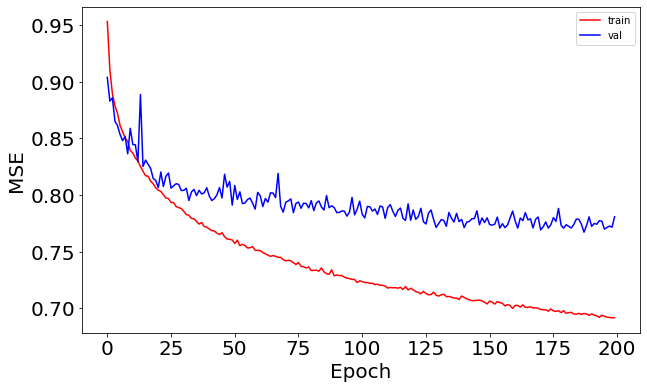

In [30]:
# Graficar el mse
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

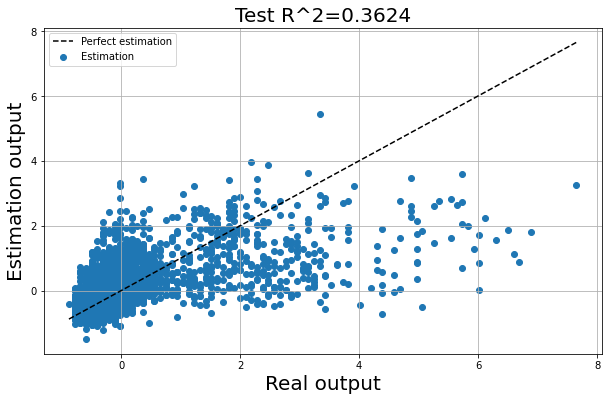

In [31]:
#Predicción  y calcular R2
yhat = model.predict(X_test)

R2_score = r2_score(y_test,yhat)

xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

### Conclusiones:
- Al final, tenemos un R2 de 0.3624, lo cual no es malo, sin embargo (desde mi punto de vista) no es algo bueno tampoco.
- Creo que una combinación un poco más grandes de 'hidden layers', tal vez más neuronas y/o usar otras funciones de activación puedo haber quedad mejor.
- Por último, parece ser que las redes neuronales son prueba y error para saber la mejor combinación.